In [1]:
###Deep learning pour la classifaction

In [5]:
import tensorflow as tf
import numpy as np

In [6]:
data = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=data.load_data()

In [7]:
training_images[45]

array([[  0,   0,   0,   1,   0,   0,   0,   0,   0,  34, 148, 202, 107,
         84, 162, 198,  90,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  21, 107, 166, 168, 152, 204, 238,
        248, 237, 190, 142, 178, 158,  98,  17,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  55, 188, 140, 131, 121, 119, 116, 146,
        157, 132, 115, 136, 125, 140, 143, 181,  51,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 167, 134, 113, 130, 134, 140, 132, 125,
        125, 131, 135, 130, 133, 131, 115, 135, 163,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 148, 133, 124, 134, 128, 135, 128, 133,
        130, 133, 137, 138, 130, 124, 130, 133, 147,  82,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,  86, 148, 158, 139, 124, 120, 131, 134, 132,
        134, 124, 134, 132, 137, 126, 137, 136, 146, 114,   0,   0,   0,
          0,   0],
       [  

In [8]:
import matplotlib.pyplot as plt


In [9]:
labels =['t-shirt/top','trouser','pullower','dress','coat','sandals','shirt','sneaker','bag','ankle boot']

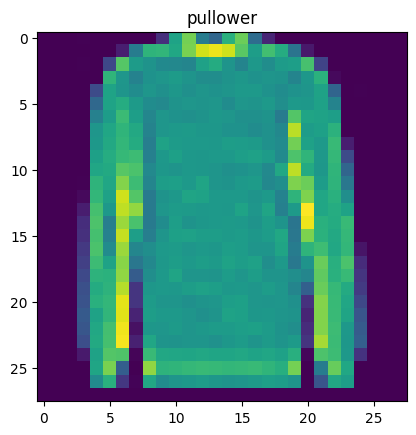

In [10]:
plt.imshow(training_images[45])
plt.title(labels[training_labels[45]])
plt.show()

In [11]:
training_labels[45]

2

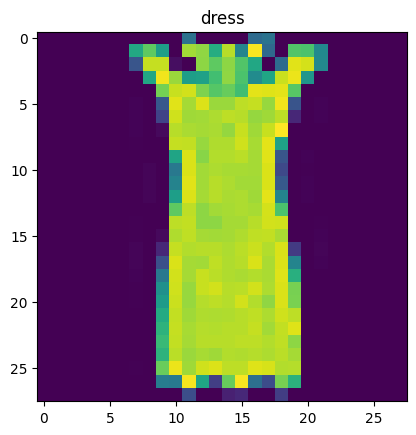

In [12]:
plt.imshow(training_images[4845])
plt.title(labels[training_labels[4845]])
plt.show()

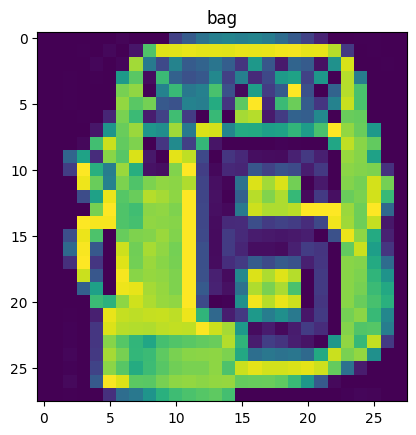

In [13]:
plt.imshow(training_images[6000])
plt.title(labels[training_labels[6000]])
plt.show()

In [23]:
## flatten image

In [14]:
training_images.shape

(60000, 28, 28)

In [15]:
a_training_images=training_images.reshape(60000,28*28)
a_test_images = test_images.reshape(-1,28*28)

In [16]:
a_training_images.shape

(60000, 784)

In [17]:
a_test_images.shape

(10000, 784)

In [18]:
#One hot encoding

In [19]:
X =np.array([1,2,1,0,3])
tf.keras.utils.to_categorical(X)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [20]:
training_labels.shape

(60000,)

In [21]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [22]:
training_labels.shape

(60000, 10)

In [23]:
test_labels.shape

(10000, 10)

In [24]:
training_labels[45] ## un pullover est comme cette matrice apres le one hot encoding

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
# 1er model de classification

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [27]:
a_training_images = a_training_images/255.0
a_test_images = a_test_images/255.0

In [28]:
model = Sequential([ Dense(units=784,activation='sigmoid'),
                    Dense(units=10,activation='softmax')
                    
                   ])
model.compile(loss='mse',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_training_images,training_labels,epochs=5,validation_data=(a_test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.0873 - accuracy: 0.3465 - val_loss: 0.0851 - val_accuracy: 0.3777
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0829 - accuracy: 0.4199 - val_loss: 0.0805 - val_accuracy: 0.4293
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0780 - accuracy: 0.4384 - val_loss: 0.0755 - val_accuracy: 0.4793
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0730 - accuracy: 0.4928 - val_loss: 0.0706 - val_accuracy: 0.5162
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0682 - accuracy: 0.5593 - val_loss: 0.0661 - val_accuracy: 0.5965


In [48]:
#training width 'croos'-'entropt' instead of 'mse'

In [50]:
model = Sequential([ Dense(units=784,activation='sigmoid'),
                    Dense(units=10,activation='softmax')
                    
                   ])
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_training_images,training_labels,epochs=5,validation_data=(a_test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 27s 13ms/step - loss: 1.1228 - accuracy: 0.6776 - val_loss: 0.7848 - val_accuracy: 0.7368
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7004 - accuracy: 0.7618 - val_loss: 0.6628 - val_accuracy: 0.7664
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6177 - accuracy: 0.7856 - val_loss: 0.6119 - val_accuracy: 0.7815
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5730 - accuracy: 0.8011 - val_loss: 0.5787 - val_accuracy: 0.7942
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5443 - accuracy: 0.8107 - val_loss: 0.5531 - val_accuracy: 0.8033


In [51]:
#training width 'recitfied_linear_units' instead of 'sigmoid'

In [53]:
model = Sequential([ Dense(units=784,activation='relu'),
                    Dense(units=10,activation='softmax')
                    
                   ])
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_training_images,training_labels,epochs=20,validation_data=(a_test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 22s 10ms/step - loss: 0.6983 - accuracy: 0.7782 - val_loss: 0.5496 - val_accuracy: 0.8157
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4955 - accuracy: 0.8330 - val_loss: 0.4941 - val_accuracy: 0.8276
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4537 - accuracy: 0.8444 - val_loss: 0.4657 - val_accuracy: 0.8380
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4293 - accuracy: 0.8526 - val_loss: 0.4546 - val_accuracy: 0.8394
Epoch 5/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4117 - accuracy: 0.8583 - val_loss: 0.4314 - val_accuracy: 0.8446
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3964 - accuracy: 0.8634 - val_loss: 0.4374 - val_accuracy: 0.8427
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3848 - accuracy: 0.8669 - val_loss: 0.4171 - va

In [54]:
#neurons plus complexes pour voir le overfitting

In [55]:
model = Sequential([ Dense(units=784,activation='relu'),
                    Dense(units=128,activation='relu'),
                    Dense(units=10,activation='softmax')
                    
                   ])
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_training_images,training_labels,epochs=5,validation_data=(a_test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 24s 11ms/step - loss: 0.6658 - accuracy: 0.7831 - val_loss: 0.5384 - val_accuracy: 0.8088
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4629 - accuracy: 0.8389 - val_loss: 0.4745 - val_accuracy: 0.8330
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4202 - accuracy: 0.8532 - val_loss: 0.4388 - val_accuracy: 0.8446
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3938 - accuracy: 0.8628 - val_loss: 0.4168 - val_accuracy: 0.8523
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3754 - accuracy: 0.8682 - val_loss: 0.4240 - val_accuracy: 0.8479


In [67]:
def plot_loss_curve(history):
    
    plt.plot(list(range(len(history['loss']))),history['loss'],label='training_loss')
    plt.plot(list(range(len(history['val_loss']))),history['val_loss'],label='test_val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Loss_curve')
    plt.legend(loc='upper right')
    plt.show()
    
    
def plot_accuracy_curve(history):
    
    plt.plot(list(range(len(history['accuracy']))),history['accuracy'],label='trainin_accuracy')
    plt.plot(list(range(len(history['val_accuracy']))),history['val_accuracy'],label='test_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.title('accuracy_curve')
    plt.legend(loc='upper left')
    plt.show()    

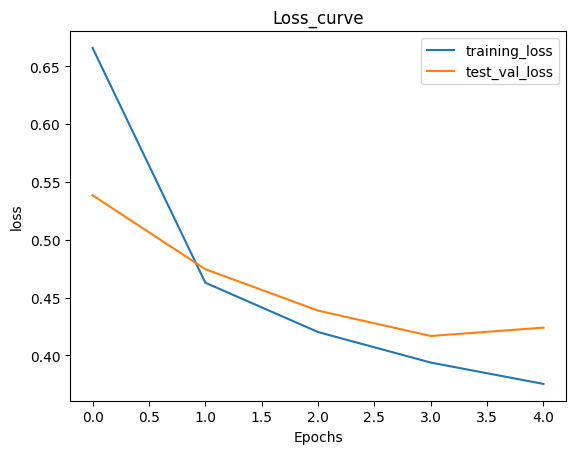

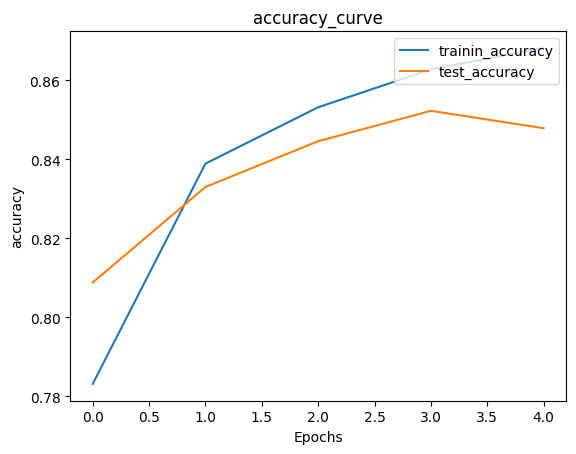

In [64]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [ ]:
#dropout pour combattre le overfitting 

In [65]:


model = Sequential([ Dense(units=784,activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    Dense(units=10,activation='softmax')
                    
                   ])
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_training_images,training_labels,epochs=20,validation_data=(a_test_images,test_labels))


Epoch 1/20
1875/1875 [==============================] - 25s 12ms/step - loss: 0.8532 - accuracy: 0.7038 - val_loss: 0.5666 - val_accuracy: 0.7977
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5800 - accuracy: 0.8005 - val_loss: 0.4855 - val_accuracy: 0.8283
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5123 - accuracy: 0.8209 - val_loss: 0.4523 - val_accuracy: 0.8399
Epoch 4/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4770 - accuracy: 0.8328 - val_loss: 0.4297 - val_accuracy: 0.8439
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4504 - accuracy: 0.8400 - val_loss: 0.4156 - val_accuracy: 0.8504
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4343 - accuracy: 0.8459 - val_loss: 0.4073 - val_accuracy: 0.8516
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4174 - accuracy: 0.8519 - val_loss: 0.3961 -

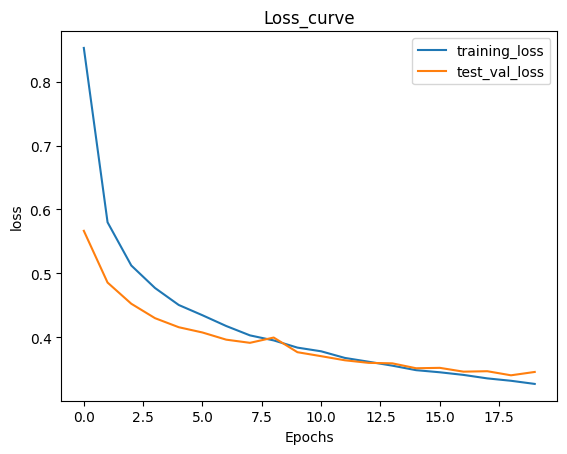

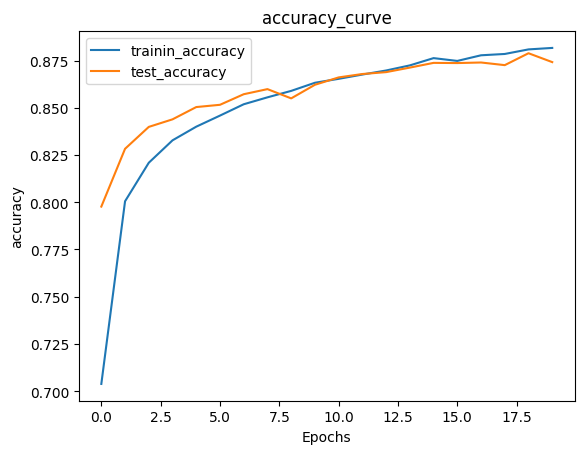

In [68]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [69]:
# Optimizer vec Adam Le concept de Momentum

In [70]:
adam =tf.keras.optimizers.Adam(
    learning_rate =0.01,
    beta_1=0.9,
    beta_2=0.999
)



model = Sequential([ Dense(units=784,activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    Dense(units=10,activation='softmax')
                    
                   ])
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
h = model.fit(a_training_images,training_labels,epochs=10,validation_data=(a_test_images,test_labels))


Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 1.0149 - accuracy: 0.6330 - val_loss: 0.6876 - val_accuracy: 0.7202
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.9090 - accuracy: 0.6656 - val_loss: 0.6031 - val_accuracy: 0.7897
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.8960 - accuracy: 0.6795 - val_loss: 0.6639 - val_accuracy: 0.7606
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.9005 - accuracy: 0.6811 - val_loss: 0.6605 - val_accuracy: 0.7706
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.9113 - accuracy: 0.6696 - val_loss: 0.6100 - val_accuracy: 0.7814
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.8930 - accuracy: 0.6702 - val_loss: 0.7005 - val_accuracy: 0.7505
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.8937 - accuracy: 0.6705 - val_loss: 0.6087 -

In [ ]:
loss: 0.3836 - accuracy: 0.8633 - val_loss: 0.3764 - val_accuracy: 0.8622

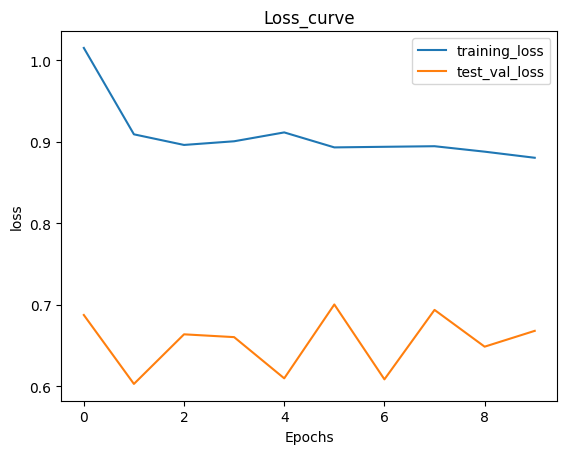

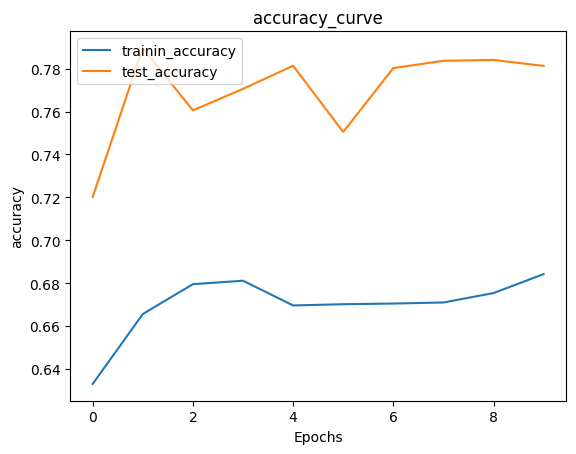

In [71]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [72]:
#Dans ce cas on utilise un model checkpoint de keras pour capturer le point au niveau duquel le loss est minim. C'est notre optimizer qui n'est pas bon.

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [29]:
# best_model ='best_model.keras'

# model_ckp = ModelCheckpoint(filepath=best_model,
# #                             save_weights_only=True,
#                            monitor='val_accuracy',
#                             model='max',
#                             save_best_only=True)

In [30]:


# model = Sequential([ Dense(units=784,activation='relu'),
#                     tf.keras.layers.Dropout(0.5),
#                     Dense(units=128,activation='relu'),
#                     tf.keras.layers.Dropout(0.3),
#                     Dense(units=10,activation='softmax')
                    
#                    ])
# model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
# h = model.fit(a_training_images,
#               training_labels,
#               epochs=20,
#               validation_data=(a_test_images,test_labels),
#               callbacks =[model_ckp]
#              )


In [118]:
# adam =tf.keras.optimizers.Adam(
#     learning_rate =0.01,
#     beta_1=0.9,
#     beta_2=0.999
# )



model = Sequential([ Dense(units=784,activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    Dense(units=10,activation='softmax')
                    
                   ])
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_training_images,
              training_labels,
              epochs=30,
              validation_data=(a_test_images,test_labels),
             )


Epoch 1/30
1875/1875 [==============================] - 17s 8ms/step - loss: 0.8621 - accuracy: 0.7004 - val_loss: 0.5550 - val_accuracy: 0.8070
Epoch 2/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5785 - accuracy: 0.8004 - val_loss: 0.4835 - val_accuracy: 0.8271
Epoch 3/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5121 - accuracy: 0.8199 - val_loss: 0.4545 - val_accuracy: 0.8342
Epoch 4/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4746 - accuracy: 0.8317 - val_loss: 0.4347 - val_accuracy: 0.8422
Epoch 5/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4498 - accuracy: 0.8413 - val_loss: 0.4156 - val_accuracy: 0.8502
Epoch 6/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4307 - accuracy: 0.8468 - val_loss: 0.4081 - val_accuracy: 0.8524
Epoch 7/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4157 - accuracy: 0.8522 - val_loss: 0.3951 - val_ac

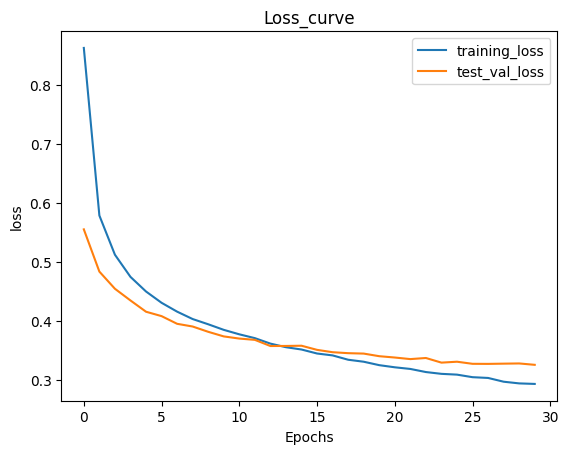

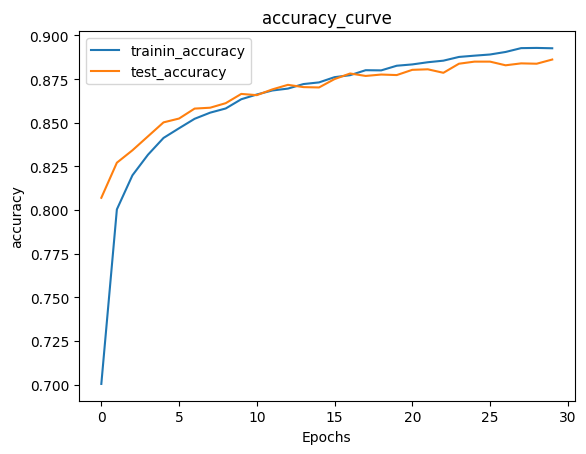

In [119]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

In [92]:
model_save=tf.keras.models.load_model('best_model.h5')

In [93]:
model_save.evaluate(a_test_images,test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3220 - accuracy: 0.8866


[0.32202234864234924, 0.8866000175476074]

In [ ]:
loss: 0.9087 - accuracy: 0.6691 - val_loss: 0.7700 - val_accuracy: 0.7075

In [84]:
# PREDICTIONS

In [94]:
model_save.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 784)               615440    
                                                                 
 dropout_10 (Dropout)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
a_test_images[1200].shape

(784,)

In [144]:
labels

['t-shirt/top',
 'trouser',
 'pullower',
 'dress',
 'coat',
 'sandals',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [147]:
test_labels[1200]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [148]:
np.argmax(test_labels[1200])

5

In [149]:
labels[5]

'sandals'

In [150]:
test_images = a_test_images[1200].reshape(1,-1)

In [151]:
test_images.shape

(1, 784)

In [152]:
pred = model.predict(test_images)

1/1 [==============================] - 0s 24ms/step


In [153]:
pred

array([[4.4216575e-12, 1.2739353e-12, 1.5248078e-13, 2.8589259e-14,
        4.6419135e-13, 1.0000000e+00, 3.3382565e-14, 6.7851630e-10,
        2.5762651e-11, 1.0913791e-08]], dtype=float32)

In [154]:
np.argmax(pred)

5

In [155]:
labels[5]

'sandals'